<a href="https://colab.research.google.com/github/mirahg/Translation-Model/blob/main/Translation_Model_Adagrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DS4420 Final Project: English-French Translation Model**
## Mirah Gordon and Jeremy Cui
### Adagrad Optimizer

# Installs




In [ ]:
# Create a directory and clone the Github MT-Preparation repository
!mkdir -p nmt
%cd nmt
!git clone https://github.com/ymoslem/MT-Preparation.git

/content/nmt
fatal: destination path 'MT-Preparation' already exists and is not an empty directory.


In [ ]:
# Install the requirements
!pip3 install -r MT-Preparation/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Raw Data

English-French Dataset:

* EN-FR: https://object.pouta.csc.fi/OPUS-UN/v20090831/moses/en-fr.txt.zip

In [ ]:
# Download and unzip a dataset
!wget https://object.pouta.csc.fi/OPUS-UN/v20090831/moses/en-fr.txt.zip
!unzip en-fr.txt.zip

--2023-04-22 03:04:34--  https://object.pouta.csc.fi/OPUS-UN/v20090831/moses/en-fr.txt.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10014972 (9.6M) [application/zip]
Saving to: ‘en-fr.txt.zip.1’

en-fr.txt.zip.1     100%[===================>]   9.55M  4.11MB/s    in 2.3s    

2023-04-22 03:04:38 (4.11 MB/s) - ‘en-fr.txt.zip.1’ saved [10014972/10014972]

Archive:  en-fr.txt.zip
replace UN.en-fr.en? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace UN.en-fr.fr? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace README? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Data Filtering

Filtering out low-quality segments can help improve the translation quality of the output MT model. This might include misalignments, empty segments, duplicates, among other issues. 

In [ ]:
# Filter the dataset
# Arguments: source file, target file, source language, target language
!python3 MT-Preparation/filtering/filter.py UN.en-fr.fr UN.en-fr.en fr en

Dataframe shape (rows, columns): (74067, 2)
--- Rows with Empty Cells Deleted	--> Rows: 74067
--- Duplicates Deleted			--> Rows: 60662
--- Source-Copied Rows Deleted		--> Rows: 60476
--- Too Long Source/Target Deleted	--> Rows: 59719
--- HTML Removed			--> Rows: 59719
--- Rows will remain in true-cased	--> Rows: 59719
--- Rows with Empty Cells Deleted	--> Rows: 59719
--- Rows Shuffled			--> Rows: 59719
--- Source Saved: UN.en-fr.fr-filtered.fr
--- Target Saved: UN.en-fr.en-filtered.en


# Tokenization / Sub-wording

MT models can only learn a specific number of vocabulary tokens due to limited hardware resources. Sub-words are used instead of whole words. At translation time, when the model sees a new word/token that looks like a word/token it has in the vocabulary, it still can try to continue the translation instead of marking this word as “unknown” or “unk”.




In [ ]:
!ls MT-Preparation/subwording/

1-train_bpe.py	1-train_unigram.py  2-subword.py  3-desubword.py


In [ ]:
# Train a SentencePiece model for subword tokenization
!python3 MT-Preparation/subwording/1-train_unigram.py UN.en-fr.fr-filtered.fr UN.en-fr.en-filtered.en

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=UN.en-fr.fr-filtered.fr --model_prefix=source --vocab_size=50000 --hard_vocab_limit=false --split_digits=true
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: UN.en-fr.fr-filtered.fr
  input_format: 
  model_prefix: source
  model_type: UNIGRAM
  vocab_size: 50000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 1
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 0
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
 

In [ ]:
!ls

en-fr.txt.zip	 README        UN.en-fr.en		UN.en-fr.fr-filtered.fr
en-fr.txt.zip.1  source.model  UN.en-fr.en-filtered.en
MT-Preparation	 target.model  UN.en-fr.fr


In [ ]:
# Subword the dataset
!python3 MT-Preparation/subwording/2-subword.py source.model target.model UN.en-fr.fr-filtered.fr UN.en-fr.en-filtered.en

Source Model: source.model
Target Model: target.model
Source Dataset: UN.en-fr.fr-filtered.fr
Target Dataset: UN.en-fr.en-filtered.en
Done subwording the source file! Output: UN.en-fr.fr-filtered.fr.subword
Done subwording the target file! Output: UN.en-fr.en-filtered.en.subword


In [ ]:
# First 3 lines before subwording
!head -n 3 UN.en-fr.fr-filtered.fr && echo "-----" && head -n 3 UN.en-fr.en-filtered.en

6. Invite les gouvernements, agissant en collaboration avec le mouvement coopératif, à mettre en place des programmes visant à promouvoir et renforcer la formation de ses membres, des cadres élus et, le cas échéant, des dirigeants des coopératives, ainsi qu'à créer des bases de données statistiques sur le développement des coopératives et sur leur contribution à l'économie nationale, ou à améliorer celles qui existent déjà ;
19. Prie également le Secrétaire général de continuer à veiller, en étroite collaboration avec le Haut Commissaire et conformément au mandat qu'elle a donné à celui-ci par sa résolution 48/141 du 20 décembre 1993, à ce que, si nécessaire, des spécialistes des droits de l'homme et du droit humanitaire participent aux missions des Nations Unies pour pouvoir se pencher sur les violations graves des droits de l'homme, par exemple les exécutions extrajudiciaires, sommaires ou arbitraires ;
1. Se félicite que le Traité sur l'AntarctiqueNations Unies, Recueil des Traités,

In [ ]:
# First 3 lines after subwording
!head -n 3 UN.en-fr.fr-filtered.fr.subword && echo "---" && head -n 3 UN.en-fr.en-filtered.en.subword

▁ 6 . ▁Invite ▁les ▁gouvernements , ▁agissant ▁en ▁collaboration ▁avec ▁le ▁mouvement ▁coopér atif , ▁à ▁mettre ▁en ▁place ▁des ▁programmes ▁visant ▁à ▁promouvoir ▁et ▁renforcer ▁la ▁formation ▁de ▁ses ▁membres , ▁des ▁cadres ▁élus ▁et , ▁le ▁cas ▁échéant , ▁des ▁dirigeants ▁des ▁coopératives , ▁ainsi ▁qu ' à ▁créer ▁des ▁bases ▁de ▁données ▁statistiques ▁sur ▁le ▁développement ▁des ▁coopératives ▁et ▁sur ▁leur ▁contribution ▁à ▁l ' économie ▁nationale , ▁ou ▁à ▁améliorer ▁celles ▁qui ▁existent ▁déjà ▁;
▁ 1 9 . ▁Prie ▁également ▁le ▁Secrétaire ▁général ▁de ▁continuer ▁à ▁veiller , ▁en ▁étroite ▁collaboration ▁avec ▁le ▁Haut ▁Commissaire ▁et ▁conformément ▁au ▁mandat ▁qu ' elle ▁a ▁donné ▁à ▁celui - ci ▁par ▁sa ▁résolution ▁ 4 8 / 1 4 1 ▁du ▁ 2 0 ▁décembre ▁ 1 9 9 3 , ▁à ▁ce ▁que , ▁si ▁nécessaire , ▁des ▁spécialistes ▁des ▁droits ▁de ▁l ' homme ▁et ▁du ▁droit ▁humanitaire ▁participent ▁aux ▁missions ▁des ▁Nations ▁Unies ▁pour ▁pouvoir ▁se ▁pencher ▁sur ▁les ▁violations ▁graves ▁des ▁dr

# Data Splitting

Split the dataset into 3 portions:

1. training dataset - used for training the model;
2. development dataset - used to run regular validations during the training to help improve the model parameters; and
3. testing dataset - a holdout dataset used after the model finishes training to finally evaluate the model on unseen data.

In [ ]:
# Split the dataset into training set, development set, and test set
# Development and test sets should be between 1000 and 5000 segments (here we chose 2000)
!python3 MT-Preparation/train_dev_split/train_dev_test_split.py 2000 2000 UN.en-fr.fr-filtered.fr.subword UN.en-fr.en-filtered.en.subword

Dataframe shape: (59719, 2)
--- Empty Cells Deleted --> Rows: 59719
--- Wrote Files
Done!
Output files
UN.en-fr.fr-filtered.fr.subword.train
UN.en-fr.en-filtered.en.subword.train
UN.en-fr.fr-filtered.fr.subword.dev
UN.en-fr.en-filtered.en.subword.dev
UN.en-fr.fr-filtered.fr.subword.test
UN.en-fr.en-filtered.en.subword.test


In [ ]:
# Line count for the subworded train, dev, test datatest
!wc -l *.subword.*

    2000 UN.en-fr.en-filtered.en.subword.dev
    2000 UN.en-fr.en-filtered.en.subword.test
   55719 UN.en-fr.en-filtered.en.subword.train
    2000 UN.en-fr.fr-filtered.fr.subword.dev
    2000 UN.en-fr.fr-filtered.fr.subword.test
   55719 UN.en-fr.fr-filtered.fr.subword.train
  119438 total


In [ ]:
# Check the first and last line from each dataset

# -------------------------------------------
# Change this cell to print your name
!echo -e "My name is: FirstName SecondName \n"
# -------------------------------------------

!echo "---First line---"
!head -n 1 *.{train,dev,test}

!echo -e "\n---Last line---"
!tail -n 1 *.{train,dev,test}

My name is: FirstName SecondName 

---First line---
==> UN.en-fr.en-filtered.en.subword.train <==
▁ 6 . ▁Invites ▁Governments , ▁in ▁collaboration ▁with ▁the ▁cooperative ▁movement , ▁to ▁develop ▁programmes ▁to ▁promote ▁and ▁strengthen ▁the ▁education ▁of ▁members , ▁the ▁elected ▁leadership ▁and ▁professional ▁cooperative ▁management , ▁where ▁appropriate , ▁and ▁to ▁create ▁or ▁improve ▁statistic al ▁databases ▁on ▁the ▁development ▁of ▁cooperatives ▁and ▁on ▁their ▁contribution ▁to ▁national ▁economies ;

==> UN.en-fr.fr-filtered.fr.subword.train <==
▁ 6 . ▁Invite ▁les ▁gouvernements , ▁agissant ▁en ▁collaboration ▁avec ▁le ▁mouvement ▁coopér atif , ▁à ▁mettre ▁en ▁place ▁des ▁programmes ▁visant ▁à ▁promouvoir ▁et ▁renforcer ▁la ▁formation ▁de ▁ses ▁membres , ▁des ▁cadres ▁élus ▁et , ▁le ▁cas ▁échéant , ▁des ▁dirigeants ▁des ▁coopératives , ▁ainsi ▁qu ' à ▁créer ▁des ▁bases ▁de ▁données ▁statistiques ▁sur ▁le ▁développement ▁des ▁coopératives ▁et ▁sur ▁leur ▁contribution ▁à ▁l ' é

# Mount your drive to save your data

Click the folder icon to the left, and then click the Google Drive icon.

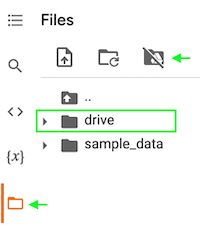

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Copy your data to your Google Drive
!cp -R /content/nmt/ /content/drive/MyDrive/

In [ ]:
# Install OpenNMT-py 3.x
!pip3 install OpenNMT-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached OpenNMT_py-3.1.1-py3-none-any.whl (227 kB)
  Using cached torch-1.13.1-cp39-cp39-manylinux1_x86_64.whl (887.4 MB)
  Using cached sacrebleu-2.3.1-py3-none-any.whl (118 kB)
  Using cached pyahocorasick-2.0.0-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (103 kB)
  Using cached ctranslate2-3.12.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (31.7 MB)
  Using cached rapidfuzz-3.0.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached pyonmttok-1.37.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.0 MB)
  Using cached ConfigArgParse-1.5.3-py3-none-any.whl (20 kB)
  Using cached waitress-2.1.2-py3-none-any.whl (57 kB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl (21.0 MB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl (849 kB)
  Using cached nvidia_cudnn_

# Open Datasets

In [ ]:
# Open the folder where you saved your prepapred datasets from the first exercise
# You might need to mount your Google Drive first
%cd /content/drive/MyDrive/nmt/
!ls

/content/drive/MyDrive/nmt
Anaconda3-5.1.0-Linux-x86_64.sh  train.log
compute-bleu.py			 UN.en-fr.en
compute-bleu.py.1		 UN.en-fr.en-filtered.en
compute-bleu.py.2		 UN.en-fr.en-filtered.en.subword
compute-bleu.py.3		 UN.en-fr.en-filtered.en.subword.dev
compute-bleu.py.4		 UN.en-fr.en-filtered.en.subword.test
condacolab_install.log		 UN.en-fr.en-filtered.en.subword.test.desubword
config.yaml			 UN.en-fr.en-filtered.en.subword.train
en-fr.txt.zip			 UN.en-fr.fr
en-fr.txt.zip.1			 UN.en-fr.fr-filtered.fr
models				 UN.en-fr.fr-filtered.fr.subword
MT-Preparation			 UN.en-fr.fr-filtered.fr.subword.dev
nmt				 UN.en-fr.fr-filtered.fr.subword.test
README				 UN.en-fr.fr-filtered.fr.subword.train
run				 UN.en.translated
source.model			 UN.en.translated.desubword
target.model


# Create the Training Configuration File

The following config file matches most of the recommended values for the Transformer model [Vaswani et al., 2017](https://arxiv.org/abs/1706.03762). As the current dataset is small, we reduced the following values: 
* `train_steps` - for datasets with a few millions of sentences, consider using a value between 100000 and 200000, or more! Enabling the option `early_stopping` can help stop the training when there is no considerable improvement.
* `valid_steps` - 10000 can be good if the value `train_steps` is big enough. 
* `warmup_steps` - obviously, its value must be less than `train_steps`. Try 4000 and 8000 values.

Refer to [OpenNMT-py training parameters](https://opennmt.net/OpenNMT-py/options/train.html) for more details. If you are interested in further explanation of the Transformer model, you can check this article, [Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/).

In [ ]:
# Create the YAML configuration file
# On a regular machine, you can create it manually or with nano
# Note here we are using some smaller values because the dataset is small
# For larger datasets, consider increasing: train_steps, valid_steps, warmup_steps, save_checkpoint_steps, keep_checkpoint

config = '''# config.yaml


## Where the samples will be written
save_data: run

# Training files
data:
    corpus_1:
        path_src: UN.en-fr.fr-filtered.fr.subword.train
        path_tgt: UN.en-fr.en-filtered.en.subword.train
        transforms: [filtertoolong]
    valid:
        path_src: UN.en-fr.fr-filtered.fr.subword.dev
        path_tgt: UN.en-fr.en-filtered.en.subword.dev
        transforms: [filtertoolong]

# Vocabulary files, generated by onmt_build_vocab
src_vocab: run/source.vocab
tgt_vocab: run/target.vocab

# Vocabulary size - should be the same as in sentence piece
src_vocab_size: 50000
tgt_vocab_size: 50000

# Filter out source/target longer than n if [filtertoolong] enabled
src_seq_length: 150
src_seq_length: 150

# Tokenization options
src_subword_model: source.model
tgt_subword_model: target.model

# Where to save the log file and the output models/checkpoints
log_file: train.log
save_model: models/model.fren

# Stop training if it does not imporve after n validations
early_stopping: 4

# Default: 5000 - Save a model checkpoint for each n
save_checkpoint_steps: 1000

# To save space, limit checkpoints to last n
# keep_checkpoint: 3

seed: 3435

# Default: 100000 - Train the model to max n steps 
# Increase to 200000 or more for large datasets
# For fine-tuning, add up the required steps to the original steps
train_steps: 3000

# Default: 10000 - Run validation after n steps
valid_steps: 1000

# Default: 4000 - for large datasets, try up to 8000
warmup_steps: 1000
report_every: 100

# Number of GPUs, and IDs of GPUs
world_size: 1
gpu_ranks: [0]

# Batching
bucket_size: 262144
num_workers: 0  # Default: 2, set to 0 when RAM out of memory
batch_type: "tokens"
batch_size: 4096   # Tokens per batch, change when CUDA out of memory
valid_batch_size: 2048
max_generator_batches: 2
accum_count: [4]
accum_steps: [0]

# Optimization
model_dtype: "fp16"
optim: "adagrad"
learning_rate: 2
# warmup_steps: 8000
decay_method: "noam"
adam_beta2: 0.998
max_grad_norm: 0
label_smoothing: 0.1
param_init: 0
param_init_glorot: true
normalization: "tokens"

# Model
encoder_type: transformer
decoder_type: transformer
position_encoding: true
enc_layers: 6
dec_layers: 6
heads: 8
hidden_size: 1024
word_vec_size: 1024
transformer_ff: 4096
dropout_steps: [0]
dropout: [0.1]
attention_dropout: [0.1]
'''

with open("config.yaml", "w+") as config_yaml:
  config_yaml.write(config)

In [ ]:
# [Optional] Check the content of the configuration file
!cat config.yaml

# config.yaml


## Where the samples will be written
save_data: run

# Training files
data:
    corpus_1:
        path_src: UN.en-fr.fr-filtered.fr.subword.train
        path_tgt: UN.en-fr.en-filtered.en.subword.train
        transforms: [filtertoolong]
    valid:
        path_src: UN.en-fr.fr-filtered.fr.subword.dev
        path_tgt: UN.en-fr.en-filtered.en.subword.dev
        transforms: [filtertoolong]

# Vocabulary files, generated by onmt_build_vocab
src_vocab: run/source.vocab
tgt_vocab: run/target.vocab

# Vocabulary size - should be the same as in sentence piece
src_vocab_size: 50000
tgt_vocab_size: 50000

# Filter out source/target longer than n if [filtertoolong] enabled
src_seq_length: 150
src_seq_length: 150

# Tokenization options
src_subword_model: source.model
tgt_subword_model: target.model

# Where to save the log file and the output models/checkpoints
log_file: train.log
save_model: models/model.fren

# Stop training if it does not imporve after n validations
early_st

# Build Vocabulary, Train Model, and Tune

For large datasets, it is not feasable to use all words/tokens found in the corpus. Instead, build a specific vocabulary set from the training dataset, usually betweeen 32k and 100k words. 

In [ ]:
# Find the number of CPUs/cores on the machine
!nproc --all

2


In [ ]:
# Build Vocabulary

# -config: path to your config.yaml file
# -n_sample: use -1 to build vocabulary on all the segment in the training dataset
# -num_threads: change it to match the number of CPUs to run it faster

!onmt_build_vocab -config config.yaml -n_sample -1 -num_threads 2

Corpus corpus_1's weight should be given. We default it to 1 for you.
[2023-04-22 03:12:07,426 INFO] Counter vocab from -1 samples.
[2023-04-22 03:12:07,426 INFO] n_sample=-1: Build vocab on full datasets.
[2023-04-22 03:12:12,576 INFO] * Transform statistics for corpus_1(50.00%):
			* FilterTooLongStats(filtered=2010)

[2023-04-22 03:12:13,329 INFO] * Transform statistics for corpus_1(50.00%):
			* FilterTooLongStats(filtered=1979)

[2023-04-22 03:12:13,377 INFO] Counters src: 14736
[2023-04-22 03:12:13,377 INFO] Counters tgt: 11897
Traceback (most recent call last):
  File "/usr/local/bin/onmt_build_vocab", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.9/dist-packages/onmt/bin/build_vocab.py", line 196, in main
    build_vocab_main(opts)
  File "/usr/local/lib/python3.9/dist-packages/onmt/bin/build_vocab.py", line 180, in build_vocab_main
    save_counter(src_counter, opts.src_vocab)
  File "/usr/local/lib/python3.9/dist-packages/onmt/bin/build_vocab.py", li

From the **Runtime menu** > **Change runtime type**, make sure that the "**Hardware accelerator**" is "**GPU**".

In [ ]:
# Check if the GPU is active
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-df6bf92f-cacb-b40c-a7e1-b9c5ce3b5293)


In [ ]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

gpu_memory = torch.cuda.mem_get_info(0)
print("Free GPU memory:", gpu_memory[0]/1024**2, "out of:", gpu_memory[1]/1024**2)

True
Tesla T4
Free GPU memory: 14998.8125 out of: 15101.8125


In [ ]:
!rm -rf drive/MyDrive/nmt/models/

In [ ]:
# Train the NMT model
!onmt_train -config config.yaml

[2023-04-22 03:12:19,023 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2023-04-22 03:12:19,601 INFO] Parsed 2 corpora from -data.
[2023-04-22 03:12:19,602 INFO] Get special vocabs from Transforms: {'src': [], 'tgt': []}.
[2023-04-22 03:12:20,941 INFO] Building model...
[2023-04-22 03:12:27,290 INFO] NMTModel(
  (encoder): TransformerEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(14720, 1024, padding_idx=1)
        )
        (pe): PositionalEncoding()
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiHeadedAttention(
          (linear_keys): Linear(in_features=1024, out_features=1024, bias=False)
          (linear_values): Linear(in_features=1024, out_features=1024, bias=False)
          (linear_query): Linear(in_features=1024, out_features=1024, bias=False)
        

'sgd', 'adagrad', 'adadelta', 'adam', 'sparseadam', 'adafactor', 'fusedadam'

# Final Model and Results

Translation Options:
* `-model` - specify the last model checkpoint name; try testing the quality of multiple checkpoints
* `-src` - the subworded test dataset, source file
* `-output` - give any file name to the new translation output file
* `-gpu` - GPU ID, usually 0 if you have one GPU. Otherwise, it will translate on CPU, which would be slower.
* `-min_length` - [optional] to avoid empty translations
* `-verbose` - [optional] if you want to print translations

Refer to [OpenNMT-py translation options](https://opennmt.net/OpenNMT-py/options/translate.html) for more details.

In [ ]:
# Translate the "subworded" source file of the test dataset
# Change the model name, if needed.
!onmt_translate -model models/model.fren_step_3000.pt -src UN.en-fr.fr-filtered.fr.subword.test -output UN.en.translated -gpu 0 -min_length 1

Traceback (most recent call last):
  File "/usr/local/bin/onmt_translate", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.9/dist-packages/onmt/bin/translate.py", line 60, in main
    translate(opt)
  File "/usr/local/lib/python3.9/dist-packages/onmt/bin/translate.py", line 41, in translate
    _, _ = translator._translate(
  File "/usr/local/lib/python3.9/dist-packages/onmt/translate/translator.py", line 353, in _translate
    batch_data = self.translate_batch(
  File "/usr/local/lib/python3.9/dist-packages/onmt/translate/translator.py", line 801, in translate_batch
    return self._translate_batch_with_strategy(
  File "/usr/local/lib/python3.9/dist-packages/onmt/translate/translator.py", line 868, in _translate_batch_with_strategy
    ) = decode_strategy.initialize(
  File "/usr/local/lib/python3.9/dist-packages/onmt/translate/beam_search.py", line 343, in initialize
    super(BeamSearch, self).initialize_(
  File "/usr/local/lib/python3.9/dist-packages/onmt/

In [ ]:
# Check the first 5 lines of the translation file
!head -n 5 UN.en.translated

In [ ]:
# If needed install/update sentencepiece
!pip3 install --upgrade -q sentencepiece

# Desubword the translation file
!python3 MT-Preparation/subwording/3-desubword.py target.model UN.en.translated

Traceback (most recent call last):

^C
Done desubwording! Output: UN.en.translated.desubword


In [ ]:
# Check the first 5 lines of the desubworded translation file
!head -n 5 UN.en.translated.desubword

16. Calls upon UN-Habitat to intensify efforts to coordinate and implement operational activities for operational activities and operational activities for operational activities, and invites all countries to provide a position to do so to support the activities of UN-Habitat in this regard;
7. Welcomes the convening of international response to marine biodiversity and the Food and Agriculture Organization of the United Nations, recognizes the role of the Food and Agriculture Organization of the United Nations, which should be in accordance with international law, including the relevant agreements of the World Trade Organization, and notes that the ongoing United Nations in this regard;
Having considered the report of the Secretary-General on the financing of the United Nations Operation in Côte d'IvoireA/61/468. and the related report of the Advisory Committee on Administrative and Budgetary Questions,A/61/551.
1. Takes note of the report of the Secretary-General;A/57/177.
(c) The ele

In [ ]:
# Desubword the target file (reference) of the test dataset
# Note: You might as well have split files *before* subwording during dataset preperation, 
# but sometimes datasets have tokeniztion issues, so this way you are sure the file is really untokenized.
!python3 MT-Preparation/subwording/3-desubword.py target.model UN.en-fr.en-filtered.en.subword.test

Done desubwording! Output: UN.en-fr.en-filtered.en.subword.test.desubword


In [ ]:
# Check the first 5 lines of the desubworded reference
!head -n 5 UN.en-fr.en-filtered.en.subword.test.desubword

16. Calls upon UN-Habitat to strengthen efforts to coordinate and implement its normative and operational activities through the enhanced normative and operational framework elaborated in the medium-term strategic and institutional plan, reinforcing its normative activities, and invites all countries in a position to do so to support the activities of UN-Habitat in this regard;
7. Welcomes the 2005 International Guidelines for the Ecolabelling of Fish and Fishery Products from Marine Capture Fisheries of the Food and Agriculture Organization of the United Nations, acknowledges the role of certification and ecolabelling schemes, which are to be consistent with international law, including relevant World Trade Organization agreements, and notes ongoing discussions in the World Trade Organization on such schemes;
Having considered the report of the Secretary-General on the financing of the United Nations Operation in Côte d'IvoireA/61/468. and the related report of the Advisory Committee 

# Evaluation

We are using BLEU for evaluation. Files must be detokenized/desubworded beforehand.

In [ ]:
# Download the BLEU script
!wget https://raw.githubusercontent.com/ymoslem/MT-Evaluation/main/BLEU/compute-bleu.py

--2023-04-22 04:38:37--  https://raw.githubusercontent.com/ymoslem/MT-Evaluation/main/BLEU/compute-bleu.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 957 [text/plain]
Saving to: ‘compute-bleu.py.5’

compute-bleu.py.5   100%[===================>]     957  --.-KB/s    in 0s      

2023-04-22 04:38:38 (30.9 MB/s) - ‘compute-bleu.py.5’ saved [957/957]



In [ ]:
# Install sacrebleu
!pip3 install sacrebleu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Evaluate the translation (without subwording)
!python3 compute-bleu.py UN.en-fr.en-filtered.en.subword.test.desubword UN.en.translated.desubword

Reference 1st sentence: 16. Calls upon UN-Habitat to strengthen efforts to coordinate and implement its normative and operational activities through the enhanced normative and operational framework elaborated in the medium-term strategic and institutional plan, reinforcing its normative activities, and invites all countries in a position to do so to support the activities of UN-Habitat in this regard;
MTed 1st sentence: 16. Calls upon UN-Habitat to intensify efforts to coordinate and implement operational activities for operational activities and operational activities for operational activities, and invites all countries to provide a position to do so to support the activities of UN-Habitat in this regard;
BLEU:  48.6884000325136
